In [1]:
# import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
import numpy as np

In [2]:
# Loading data
# path may be different than mine
file_path = Path("../Resources/renamed_tornado_data.csv")
tornado_df = pd.read_csv(file_path)
print(tornado_df.shape)
tornado_df.head()


(67558, 14)


,Year,Month,Day,Date,State,Magnitude,Injuries,Fatalities,Start Lat,Start Long,Ending Lat,Ending Long,Length_in_Miles,Width_in_Yards
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [3]:
# look for unique values
tornado_df.nunique()

Year                  72
Month                 12
Day                   31
Date               12300
State                 53
Magnitude              7
Injuries             209
Fatalities            50
Start Lat          14215
Start Long         16024
Ending Lat         15043
Ending Long        16571
Length_in_Miles     2429
Width_in_Yards       405
dtype: int64

In [4]:
# check unique vales per column and decide if we want to replace any
count=tornado_df.Length_in_Miles.value_counts()
count[:10]

0.10     15664
0.50      4950
1.00      4666
0.20      4542
2.00      2775
0.30      2477
3.00      1171
1.50      1138
5.00       753
4.00       703
0.80       604
2.50       533
6.00       464
0.01       463
0.40       450
8.00       406
0.70       382
7.00       379
10.00      373
Name: Length_in_Miles, dtype: int64

In [5]:
# how many rows and columns
print(tornado_df.shape)

(67558, 14)


In [6]:
# Check types
tornado_df.dtypes

Year                 int64
Month                int64
Day                  int64
Date                object
State               object
Magnitude            int64
Injuries             int64
Fatalities           int64
Start Lat          float64
Start Long         float64
Ending Lat         float64
Ending Long        float64
Length_in_Miles    float64
Width_in_Yards       int64
dtype: object

In [7]:
# Look for null values
for column in tornado_df.columns:
    print(f"Column {column} has {tornado_df[column].isnull().sum()} null values")

Column Year has 0 null values
Column Month has 0 null values
Column Day has 0 null values
Column Date has 0 null values
Column State has 0 null values
Column Magnitude has 0 null values
Column Injuries has 0 null values
Column Fatalities has 0 null values
Column Start Lat has 0 null values
Column Start Long has 0 null values
Column Ending Lat has 0 null values
Column Ending Long has 0 null values
Column Length_in_Miles has 0 null values
Column Width_in_Yards has 0 null values


In [8]:
# look for duplicate rows
# Have fun playing with this. Tons and tons of duplicates! We will keep them all bc tornados happen everywhere all the time
print(f"Duplicate entries: {tornado_df[('Year')].duplicated().sum()}")

Duplicate entries: 67486


In [9]:
# drop columns if needed
# inplace = True means we are using this database instead of reassigning data base
tornado_df.drop(columns =["Year", "Month", "Day", "Date", "State", "Ending Lat", "Ending Long"], inplace=True)
tornado_df.head()

,Magnitude,Injuries,Fatalities,Start Lat,Start Long,Length_in_Miles,Width_in_Yards
0,3,3,0,39.10,-89.30,3.6,130
1,3,3,0,38.77,-90.22,9.5,150
2,1,1,0,40.88,-84.58,0.1,10
3,3,1,1,34.40,-94.37,0.6,17
4,2,0,0,41.17,-87.33,0.1,100


In [10]:
# Create target(y) and features(X) arrays
y = tornado_df["Injuries"].values
X = tornado_df.drop(["Injuries"],1).values

C:\Users\matth\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Split into our training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)

In [12]:
# create scaler, fit, transform training and testing sets
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# RANDOM FOREST MODEL

In [13]:
# create model
rfr_model = RandomForestRegressor(n_estimators=110, random_state=1)

In [14]:
# Fit model
rfr_model = rfr_model.fit(X_train_scaled, y_train)

In [15]:
# Evaluate model
pred = rfr_model.predict(X_test_scaled)
# print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")
print(pred)

[1.3        0.         0.05454545 ... 1.2        0.07272727 1.14545455]


In [16]:
# Define the model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 48
hidden_nodes_layer2 = 36
hidden_nodes_layer3 = 24
hidden_nodes_layer4 = 12
hidden_nodes_layer5 = 10
hidden_nodes_layer6 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# sixth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile model
nn.compile(loss="mean_absolute_error", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1584/1584 [==============================] - 5s 2ms/step - loss: 1.4020 - accuracy: 0.8813
Epoch 2/50
1584/1584 [==============================] - 3s 2ms/step - loss: 1.3891 - accuracy: 0.8810
Epoch 3/50
1584/1584 [==============================] - 4s 2ms/step - loss: 1.3911 - accuracy: 0.8795
Epoch 4/50
1584/1584 [==============================] - 4s 2ms/step - loss: 1.3914 - accuracy: 0.8846
Epoch 5/50
1584/1584 [==============================] - 3s 2ms/step - loss: 1.3918 - accuracy: 0.8768
Epoch 6/50
1584/1584 [==============================] - 3s 2ms/step - loss: 1.3902 - accuracy: 0.8783
Epoch 7/50
1584/1584 [==============================] - 3s 2ms/step - loss: 1.3902 - accuracy: 0.8847
Epoch 8/50
1584/1584 [==============================] - 3s 2ms/step - loss: 1.3912 - accuracy: 0.8837
Epoch 9/50
1584/1584 [==============================] - 4s 2ms/step - loss: 1.3901 - accuracy: 0.8819
Epoch 10/50
1584/1584 [==============================] - 3s 2ms/step - loss: 1.389

# MULTILE LINEAR REGRESSION MODEL

In [17]:
# Train the model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [18]:
# check coeffecients
mlr.coef_

array([ 3.63000434e-01,  8.94784717e+00, -1.58177497e-03,  1.66001103e-02,
        1.42710145e-01,  1.84483145e-03])

In [19]:
# find intercept
mlr.intercept_

1.2701634725665572

In [20]:
# test training model
y_pred = mlr.predict(X_test)
print(y_pred)

[ 0.86231533  0.19880106 -0.16119493 ...  0.66463495  0.9244673
  0.62866001]


In [21]:
# Predict against know value row 1
mlr.predict([[3,0,39.10,-89.30,3.6,130]])
# dataset is 3, predict model is 1.56

array([1.56851213])

In [22]:
metrics.r2_score(y_test,y_pred)

0.6581065063815426

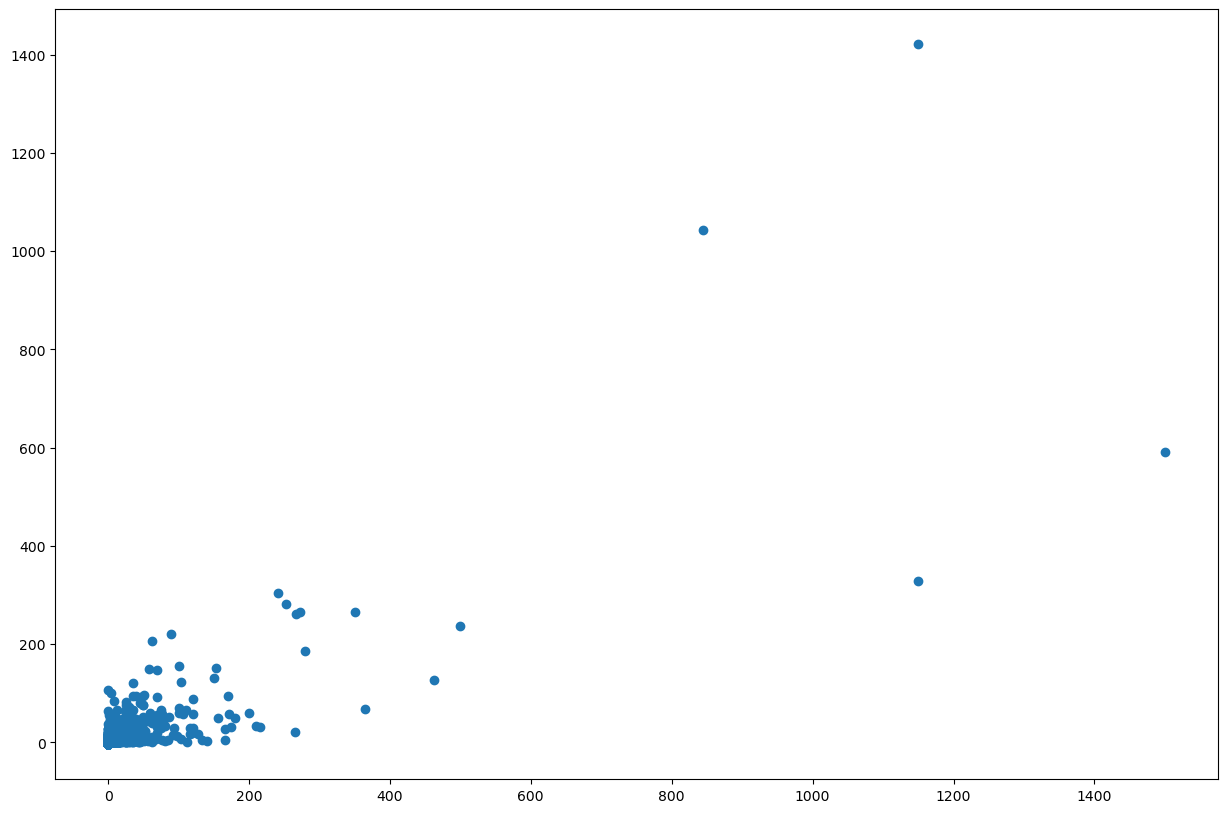

In [48]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)

In [24]:
pred_df = pd.DataFrame({'Actual_Injuries': y_test, 'Predicted_injuries': y_pred, 'Difference': y_test-y_pred})
pred_df.head(20)

,Actual_Injuries,Predicted_injuries,Difference
0,1,0.862315,0.137685
1,0,0.198801,-0.198801
2,0,-0.161195,0.161195
3,0,-0.082751,0.082751
4,0,-0.318208,0.318208
5,0,1.406309,-1.406309
6,0,0.254982,-0.254982
7,0,0.185276,-0.185276
8,0,-0.406548,0.406548
9,0,-0.139963,0.139963


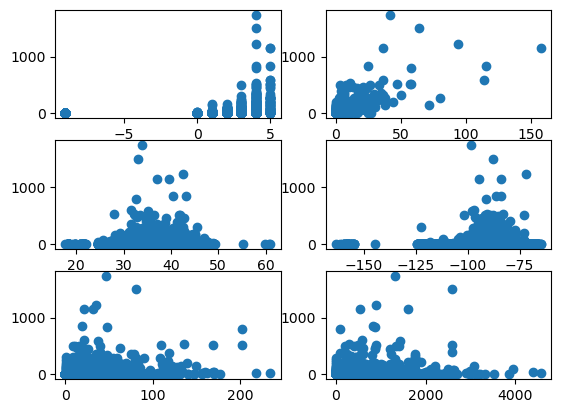

In [39]:
# PLot all features against y
plt.subplot(3,2,1)
plt.scatter(tornado_df['Magnitude'],tornado_df['Injuries'])
plt.subplot(3,2,2)
plt.scatter(tornado_df['Fatalities'],tornado_df['Injuries'])
plt.subplot(3,2,3)
plt.scatter(tornado_df['Start Lat'],tornado_df['Injuries'])
plt.subplot(3,2,4)
plt.scatter(tornado_df['Start Long'],tornado_df['Injuries'])
plt.subplot(3,2,5)
plt.scatter(tornado_df['Length_in_Miles'],tornado_df['Injuries'])
plt.subplot(3,2,6)
plt.scatter(tornado_df['Width_in_Yards'],tornado_df['Injuries'])